# Kardio: Using KNN to Advance Predictive Analytics for Heart Disease Diagnosis

**Group:** 3

**Members:** Maggie Cui, Tristan Heilbron, David Li, Ivy Nguyen

## Introduction

Heart disease is currently the leading cause of death globally and the second leading in Canada (Statistics Canada, 2023; World Health Organization, 2020). It is associated with plaque buildup in arteries, which could result in heart attack, heart failure, or death. Various factors impact the likely-hood of heart disease (age, cholesterol, blood pressure), however, it is difficult to identify the specific cause. Thus, in better determining its primary contributing factors and improving diagnosis, we pose the question "**what measurable factors most strongly impact the occurrence of heart disease, and based on these factors, will a new patient have heart disease?**"

We will utilize the **Heart Disease** database compiled by Detrano et al. (1988) which contains four datasets with 76 variables. However, we will only use the processed datasets collected by the Cleveland Clinic Foundation and Hungarian Institute of Cardiology, which contain 14 relevant variables. We selected these datasets because of their large number of observations to improve accuracy and to represent a wider population.

## Exploratory Data Analysis

### Loading required libraries

In [1]:
library(tidyverse)
library(tidymodels)
library(cowplot)
library(repr)
library(RColorBrewer)

# Setting a seed so our analysis is random but reproducible
set.seed(2005)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Loading the dataset

In [2]:
cleveland_data_url <- "https://raw.githubusercontent.com/MYYaaa/datascience_project_group3/main/data/processed.cleveland.data"
hungarian_data_url <- "https://raw.githubusercontent.com/MYYaaa/datascience_project_group3/main/data/processed.hungarian.data"

data_column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland_data <- read_csv(cleveland_data_url, col_names = data_column_names)
hungarian_data <- read_csv(hungarian_data_url, col_names = data_column_names)

glimpse(cleveland_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 303
Columns: 14
$ age      <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 5…
$ sex      <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1…
$ cp       <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, 1…
$ trestbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 1…
$ chol     <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 2…
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2…
$ thalach  <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 1…
$ exang    <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1…
$ oldpeak  <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0…
$ slope    <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2…
$ ca       <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0", "1.0"…
$ thal     <chr> "

### Cleaning and wrangling the data

In [3]:
# Substituting all "?" with NA
# REFERENCE: https://stackoverflow.com/a/19503330
cleveland_data[cleveland_data == "?"] <- NA
hungarian_data[hungarian_data == "?"] <- NA

# Converting to correct data types
numeric_column_names <- c("age", "trestbps", "chol", "thalach", "oldpeak", "ca")
factor_column_names <- c("sex", "cp", "fbs", "restecg", "exang", "slope", "thal", "num")

cleveland_data <- cleveland_data |>
    mutate(across(all_of(numeric_column_names), as.numeric)) |>
    mutate(across(all_of(factor_column_names), as_factor))

hungarian_data <- hungarian_data |>
    mutate(across(all_of(numeric_column_names), as.numeric)) |>
    mutate(across(all_of(factor_column_names), as_factor))

# Combining the two data sets
heart_disease_data <- bind_rows(cleveland_data, hungarian_data)

# Make the label variable more readable
heart_disease_data <- heart_disease_data |>
    mutate(diagnosis = fct_recode(num, "absent" = "0", "present" = "1", "present" = "2", "present" = "3", "present" = "4")) |>
    # Move the label to be the first column
    relocate(diagnosis) |>
    select(-num)

# Display the tidied data set with all variables
glimpse(heart_disease_data)

# Select only the variables we plan on using
variables_of_interest <- c("diagnosis", "age", "trestbps", "chol", "thalach", "oldpeak")

heart_disease_data <- select(heart_disease_data, all_of(variables_of_interest))

# Display the tidied data set with only the variables
# we are using
glimpse(heart_disease_data)

Rows: 597
Columns: 14
$ diagnosis <fct> absent, present, present, absent, absent, absent, present, a…
$ age       <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, …
$ sex       <fct> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, …
$ cp        <fct> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, …
$ trestbps  <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, …
$ chol      <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, …
$ fbs       <fct> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, …
$ restecg   <fct> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, …
$ thalach   <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, …
$ exang     <fct> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ oldpeak   <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, …
$ slope     <fct> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, …
$ ca        <dbl> 

### Splitting the data

In [4]:
heart_disease_data_split <- heart_disease_data |>
    initial_split(prop = 0.75, strata = diagnosis)

heart_disease_training <- training(heart_disease_data_split)
heart_disease_testing <- testing(heart_disease_data_split)

### Summary of training data

In [5]:
# Display the number of observations for each diagnoses

total_observation_count <- nrow(heart_disease_training)

observation_count_summary <- heart_disease_training |>
    group_by(diagnosis) |>
    summarize(number_of_observations = n(),
              percentage = (n() / total_observation_count) * 100)

observation_count_summary

diagnosis,number_of_observations,percentage
<fct>,<int>,<dbl>
absent,264,59.0604
present,183,40.9396


In [6]:
# Display number of rows with missing data

missing_data_summary <- heart_disease_training |>
    group_by(diagnosis) |>
    filter(if_any(everything(), is.na)) |>
    summarize(number_of_rows_with_missing_values = n())

missing_data_summary

diagnosis,number_of_rows_with_missing_values
<fct>,<int>
absent,16
present,2


In [7]:
# Display the average value of predictor variables

average_value_summary <- heart_disease_training |>
    # Add a suffix to the column names except for diagnosis
    # REFERENCE: https://dplyr.tidyverse.org/reference/rename.html
    rename_with(~ paste(.x, "average", sep = "_"), -diagnosis) |>
    group_by(diagnosis) |>
    summarize(across(everything(), ~ mean(.x, na.rm = TRUE)))

average_value_summary

diagnosis,age_average,trestbps_average,chol_average,thalach_average,oldpeak_average
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
absent,50.06061,130.5095,243.2570,149.4981,0.4117424
present,53.72678,135.8743,260.5801,134.3607,1.3595628


### Visualization of training data

Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 17 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”


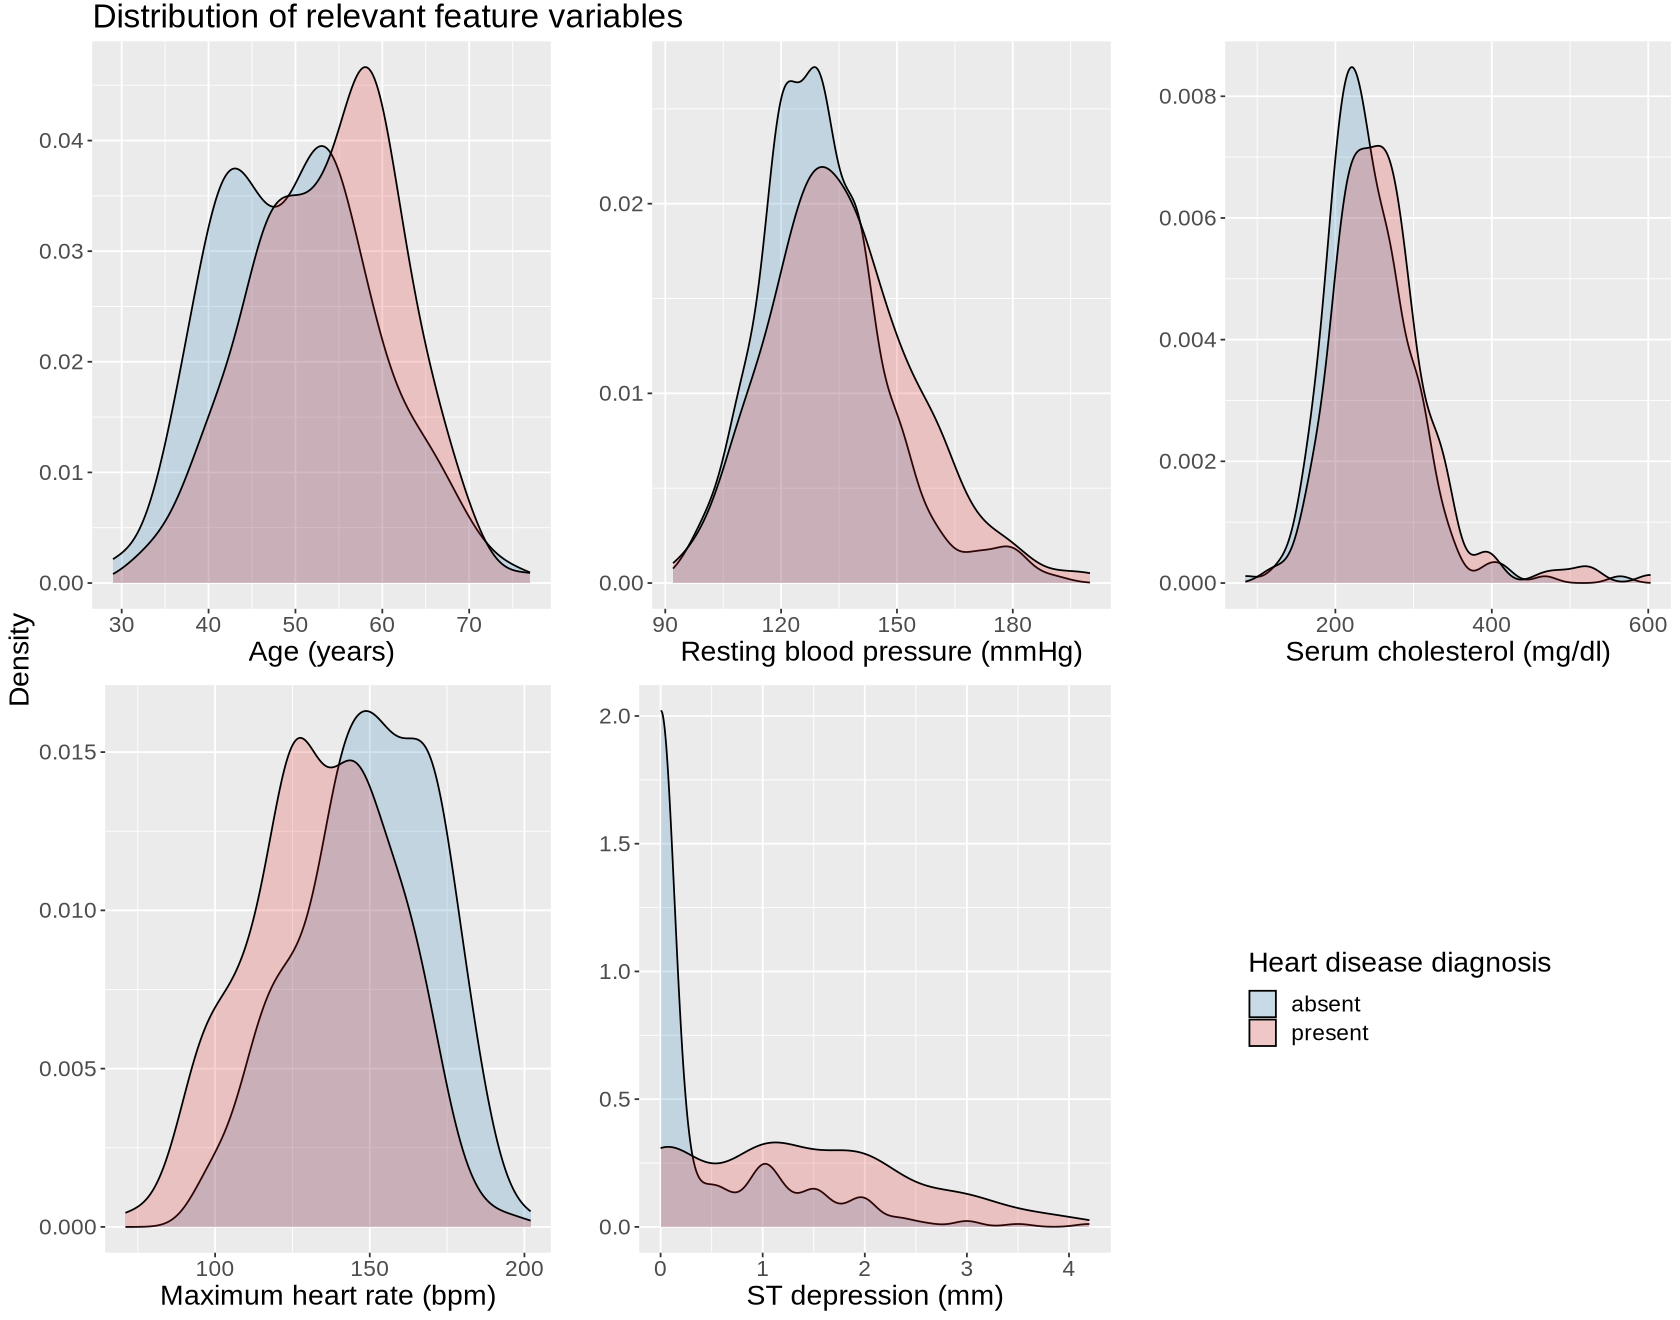

In [8]:
# Visualize the distribution of our relevant feature variables
options(repr.plot.width = 14, repr.plot.height = 11)

# Create a distribution plot for all feature variables
# with some colour blind friendly fill colours
age_distribution_plot <- heart_disease_training |>
    ggplot(aes(x = age, fill = diagnosis)) +
        geom_density(alpha = 0.2) +
        labs(x = "Age (years)", y = "",
             fill = "Heart disease diagnosis") +
        theme(text = element_text(size = 17),
              legend.direction = "vertical") +
        scale_fill_manual(values = c("#1F78B4", "#E31A1C"))

trestbps_distribution_plot <- heart_disease_training |>
    ggplot(aes(x = trestbps, fill = diagnosis)) +
        geom_density(alpha = 0.2) +
        labs(x = "Resting blood pressure (mmHg)", y = "") +
        theme(text = element_text(size = 17),
              legend.position = "none") +
        scale_fill_manual(values = c("#1F78B4", "#E31A1C"))

chol_distribution_plot <- heart_disease_training |>
    ggplot(aes(x = chol, fill = diagnosis)) +
        geom_density(alpha = 0.2) +
        labs(x = "Serum cholesterol (mg/dl)", y = "") +
        theme(text = element_text(size = 17),
              legend.position = "none") +
        scale_fill_manual(values = c("#1F78B4", "#E31A1C"))

thalach_distribution_plot <- heart_disease_training |>
    ggplot(aes(x = thalach, fill = diagnosis)) +
        geom_density(alpha = 0.2) +
        labs(x = "Maximum heart rate (bpm)", y = "") +
        theme(text = element_text(size = 17),
              legend.position = "none") +
        scale_fill_manual(values = c("#1F78B4", "#E31A1C"))

oldpeak_distribution_plot <- heart_disease_training |>
    ggplot(aes(x = oldpeak, fill = diagnosis)) +
        geom_density(alpha = 0.2) +
        labs(x = "ST depression (mm)", y = "") +
        theme(text = element_text(size = 17),
              legend.position = "none") +
        scale_fill_manual(values = c("#1F78B4", "#E31A1C"))

# REFERENCES:
# https://wilkelab.org/cowplot/articles/plot_grid.html
# https://wilkelab.org/cowplot/articles/shared_legends.html

# Extract the legend from the age plot
distribution_plots_legend <- get_legend(age_distribution_plot)

# Plot all the distribution plots and the shared legend
distribution_plots <- plot_grid(age_distribution_plot + theme(legend.position = "none"),
                                trestbps_distribution_plot,
                                chol_distribution_plot,
                                thalach_distribution_plot,
                                oldpeak_distribution_plot,
                                distribution_plots_legend)

# Create a plot title
distribution_plots_title <- ggdraw() +
    draw_label("Distribution of relevant feature variables",
               x = 0.055,
               hjust = 0,
               size = 20)

# Add the plot title and y axis label
distribution_plots <- plot_grid(distribution_plots_title,
                                distribution_plots,
                                ncol = 1,
                                rel_heights = c(0.025, 1)) +
    draw_label("Density", x = 0, y = 0.5, vjust = 1.5, angle = 90, size = 17)

distribution_plots

Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 17 rows containing missing values (`geom_point()`).”


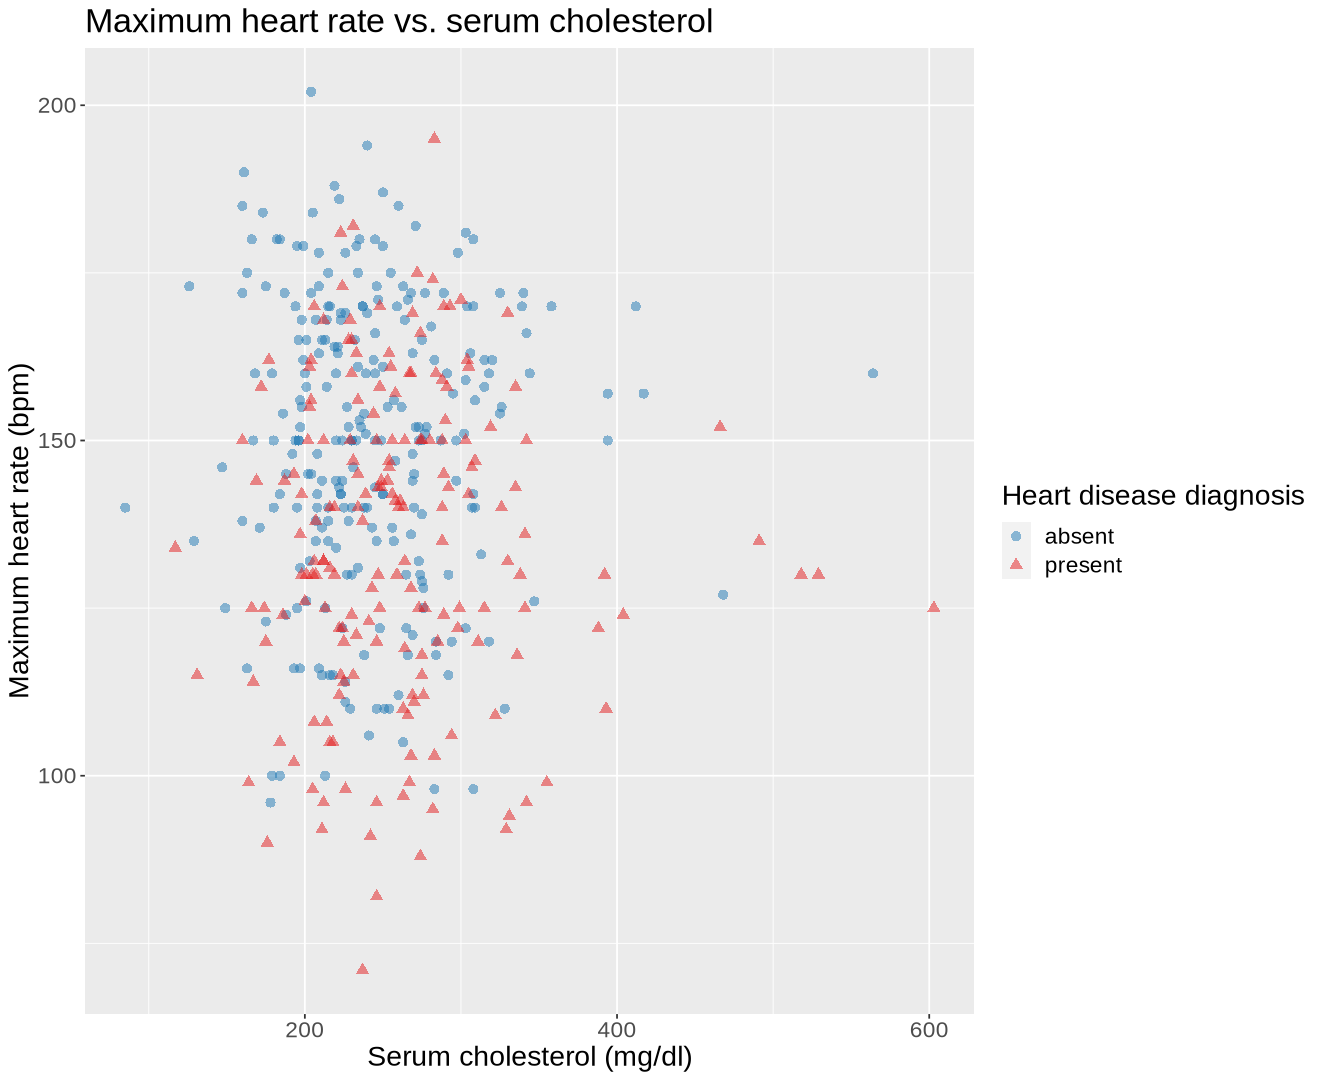

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


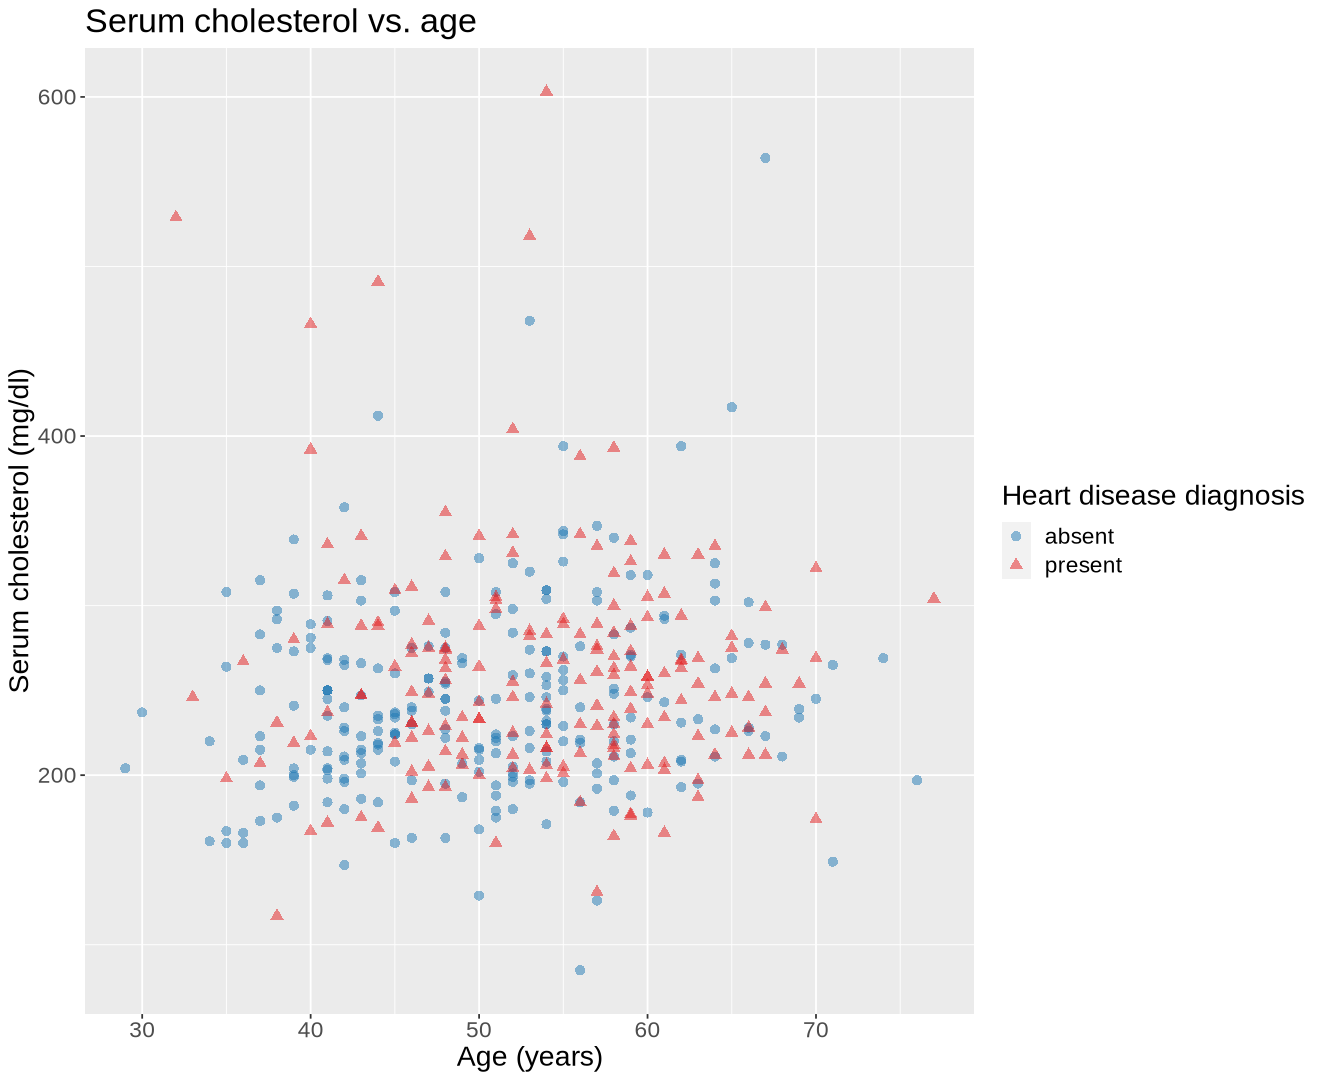

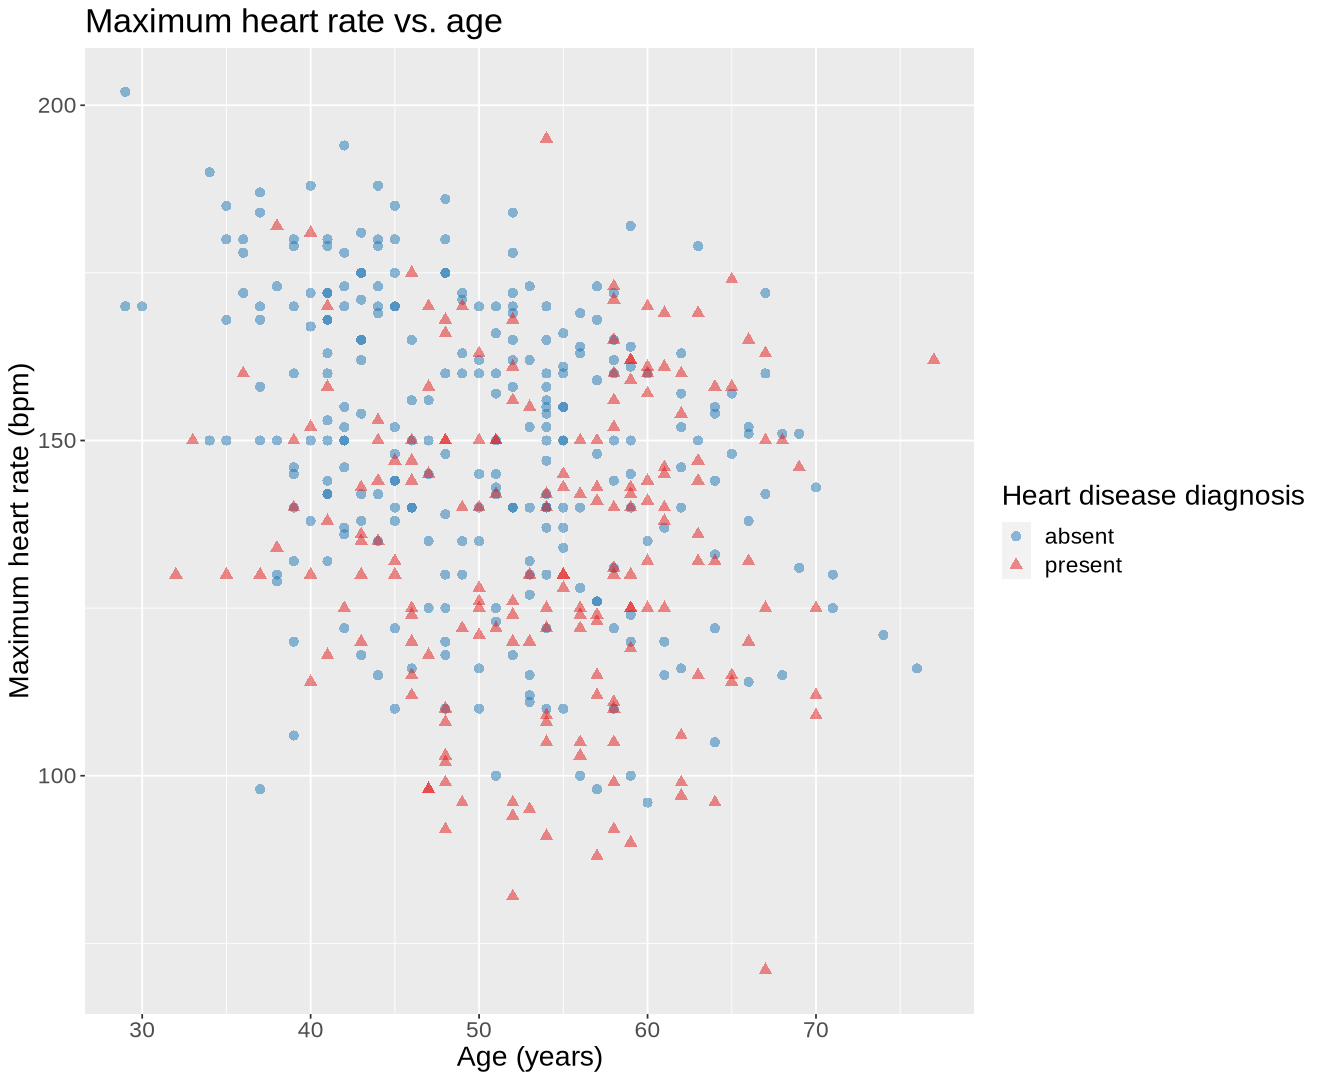

In [9]:
# Visualize the trends or grouping between pairs of feature variables

options(repr.plot.width = 11, repr.plot.height = 9)

thalach_vs_chol_plot <- heart_disease_training |>
    ggplot(aes(x = chol, y = thalach, colour = diagnosis, shape = diagnosis)) +
        geom_point(alpha = 0.5, size = 2.5) +
        labs(x = "Serum cholesterol (mg/dl)",
             y = "Maximum heart rate (bpm)",
             colour = "Heart disease diagnosis",
             shape = "Heart disease diagnosis",
             title = "Maximum heart rate vs. serum cholesterol") +
        # Use some color blind friendly colors
        scale_color_manual(values = c("#1F78B4", "#E31A1C")) +
        theme(text = element_text(size = 17))

thalach_vs_chol_plot

chol_vs_age <- heart_disease_training |>
    ggplot(aes(x = age, y = chol, colour = diagnosis, shape = diagnosis)) +
        geom_point(alpha = 0.5, size = 2.5) +
        labs(x = "Age (years)",
             y = "Serum cholesterol (mg/dl)",
             colour = "Heart disease diagnosis",
             shape = "Heart disease diagnosis",
             title = "Serum cholesterol vs. age") +
        # Use some color blind friendly colors
        scale_color_manual(values = c("#1F78B4", "#E31A1C")) +
        theme(text = element_text(size = 17))

chol_vs_age

thalach_vs_age <- heart_disease_training |>
    ggplot(aes(x = age, y = thalach, colour = diagnosis, shape = diagnosis)) +
        geom_point(alpha = 0.5, size = 2.5) +
        labs(x = "Age (years)",
             y = "Maximum heart rate (bpm)",
             colour = "Heart disease diagnosis",
             shape = "Heart disease diagnosis",
             title = "Maximum heart rate vs. age") +
        # Use some color blind friendly colors
        scale_color_manual(values = c("#1F78B4", "#E31A1C")) +
        theme(text = element_text(size = 17))

thalach_vs_age

## Methods

We will combine then preprocess these datasets through tidying and wrangling, extracting relevant variables, splitting it into 75% training and 25% testing sets, and performing standardization and mean imputation. Our model will be trained using the K-nearest neighbors algorithm and its performance will be evaluated using the testing set. We will also perform forward selection to determine the most relevant feature variables and tune the K parameter with a 5-fold cross-validation.

Our feature variables are
1. **Age** (**age**): As age increases, more plaque accumulates and arteries stiffen, restricting blood flow and amplifying the effects of plaque buildup (Stern et al., 2003).
2. **Resting blood pressure** (**trestbps**): High blood pressure damages arteries and excessively strains the heart (Tackling & Borhade, 2019).
3. **Serum cholesterol** (**chol**): High levels of cholesterol in the bloodstream results in plaque buildup (Jung et al., 2022).
4. **Maximum heart rate** (**thalach**): Low maximum heart rate is indicative of low aerobic capacity, potentially a result of excessive strain or damage to the heart (Harvard Health Publishing, 2020).
5. **Exercise induced ST depression** (**oldpeak**): ST depression in the electrocardiogram could indicate a reduction in blood flow to the heart from plaque buildup (Kashou & Kashou, 2019).

Our label variable is **num** (renamed to **diagnosis**). As the authors never indicated what a value of 2, 3, or 4 meant, we will assume it indicates the presence (1, 2, 3, 4) or absence (0) of heart disease.

We will visualize our results using
1. **Density plot**: Visualize the distribution of our feature variables. Less noisy than a histogram when comparing variables on one plot.
2. **Scatter plot**: Visualize pairs of feature variables to identify possible patterns or groupings. 

## Expected Outcomes and Significance

### Expected findings

We expect age, maximum heart rate, and ST depression to have the most significant effect on the presence of heart disease. We also expect our model to perform significantly better than a majority classifier given the clear relationship between the features and the label shown by our preliminary data analysis.

### Impact of findings

Based on these factors, the presence of heart disease can be better predicted in new patients, improving existing diagnosis and treatment models. Our findings may also demonstrate correlations between heart disease occurrence and lifestyle. Lastly, the model presents a non-invasive method of diagnosing heart disease as opposed to traditional methods like angiography (Tavakol et al., 2011).

### Future questions

1. How applicable is our model for patients today despite lifestyle changes and improvements in healthcare?
2. Can the severity and type of heart disease be identified in a patient?

## References

<pre>
Detrano, R., Janosi, A., Steinbrunn, W., & Pfisterer, M. (1988). Heart Disease. In UCI Machine Learning Repository.
    https://doi.org/10.24432/C52P4X
    
Harvard Health Publishing. (2020, August 30). What your heart rate is telling you - Harvard Health. Harvard Health; Harvard Health.
    https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you
    
Jung, E., Kong, S. Y., Ro, Y. S., Ryu, H. H., & Shin, S. D. (2022). Serum Cholesterol Levels and Risk of Cardiovascular Death:
    A Systematic Review and a Dose-Response Meta-Analysis of Prospective Cohort Studies.
    International Journal of Environmental Research and Public Health, 19(14), 8272.
    https://doi.org/10.3390/ijerph19148272
    
Kashou, A. H., & Kashou, H. E. (2019). Rhythm, ST Segment. Nih.gov; StatPearls Publishing.
    https://www.ncbi.nlm.nih.gov/books/NBK459364/
    
Statistics Canada. (2023). Leading causes of death, total population, by age group.
    https://doi.org/10.25318/1310039401-eng
    
Stern, S., Behar, S., & Gottlieb, S. (2003). Aging and Diseases of the Heart. Circulation, 108(14).
    https://doi.org/10.1161/01.cir.0000086898.96021.b9
    
Tackling, G., & Borhade, M. B. (2019). Hypertensive Heart Disease. Nih.gov; StatPearls Publishing.
    https://www.ncbi.nlm.nih.gov/books/NBK539800/
    
Tavakol, M., Ashraf, S., & Brener, S. J. (2011). Risks and Complications of Coronary Angiography: A Comprehensive Review. Global Journal of Health Science, 4(1).
    https://doi.org/10.5539/gjhs.v4n1p65
    
World Health Organization. (2020, December 9). The Top 10 Causes of Death. World Health Organization; WHO.
    https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-deathof-death
</pre>